## Δημιουργήσαμε τα αρχικά σήματα και τα εμφανίσαμε

C:\Users\kosti_0b5rpb8\anaconda3\envs\dsp_project1\lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


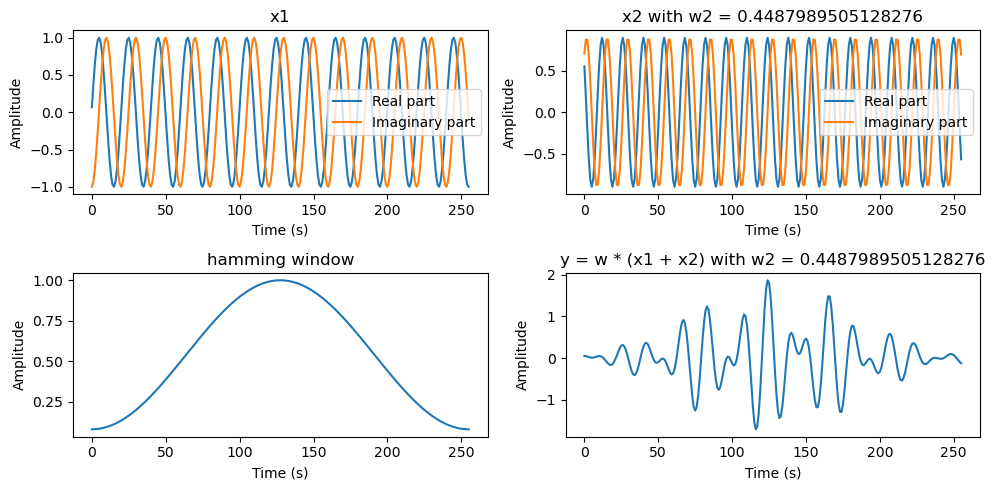

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import pi
from cmath import exp

# Initial values:
A1, A2 = 1, 0.9
L = 256
w1 = pi / 10
phi1, phi2 = np.random.uniform(0, 2 * pi), np.random.uniform(0, 2 * pi)

w2_arr = [pi/(7 + 0.5 * i) for i in range(6)]
for i in range(1, 10): w2_arr.append(pi/(9.5 + 0.05 * i))

x2_arr = np.array([[A2 * exp(1j * (w2 * n + phi2)) for n in range(L)] for w2 in w2_arr])

x1 = np.array([A1 * exp(1j * (w1 * n + phi1)) for n in range(L)])
w = np.hamming(L)

# C = A * B se np array to C θα έχει διαστάσεις του  A,B kai C[i] = A[i] * B[i] αντίστοιχα για το  +
y_arr = [w * (x1 + x2_arr[i]) for i in range(len(x2_arr))]

Ts = 1  # time interval between samples.
t = np.arange(0, L, Ts)

# Plot the signal
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))

axs[0][0].plot(t, np.real(x1), label='Real part')
axs[0][0].plot(t, np.imag(x1), label='Imaginary part')
axs[0][0].set_xlabel('Time (s)')
axs[0][0].set_ylabel('Amplitude')
axs[0][0].set_title('x1')
axs[0][0].legend()

axs[0][1].plot(t, np.real(x2_arr[0]), label='Real part')
axs[0][1].plot(t, np.imag(x2_arr[0]), label='Imaginary part')
axs[0][1].set_xlabel('Time (s)')
axs[0][1].set_ylabel('Amplitude')
axs[0][1].set_title(f'x2 with w2 = {w2_arr[0]}')
axs[0][1].legend()

axs[1][0].plot(t, w)
axs[1][0].set_xlabel('Time (s)')
axs[1][0].set_ylabel('Amplitude')
axs[1][0].set_title('hamming window')

axs[1][1].plot(t, y_arr[0])
axs[1][1].set_xlabel('Time (s)')
axs[1][1].set_ylabel('Amplitude')
axs[1][1].set_title(f'y = w * (x1 + x2) with w2 = {w2_arr[0]}')

# Add spacing between subplots.
fig.tight_layout()

plt.show()

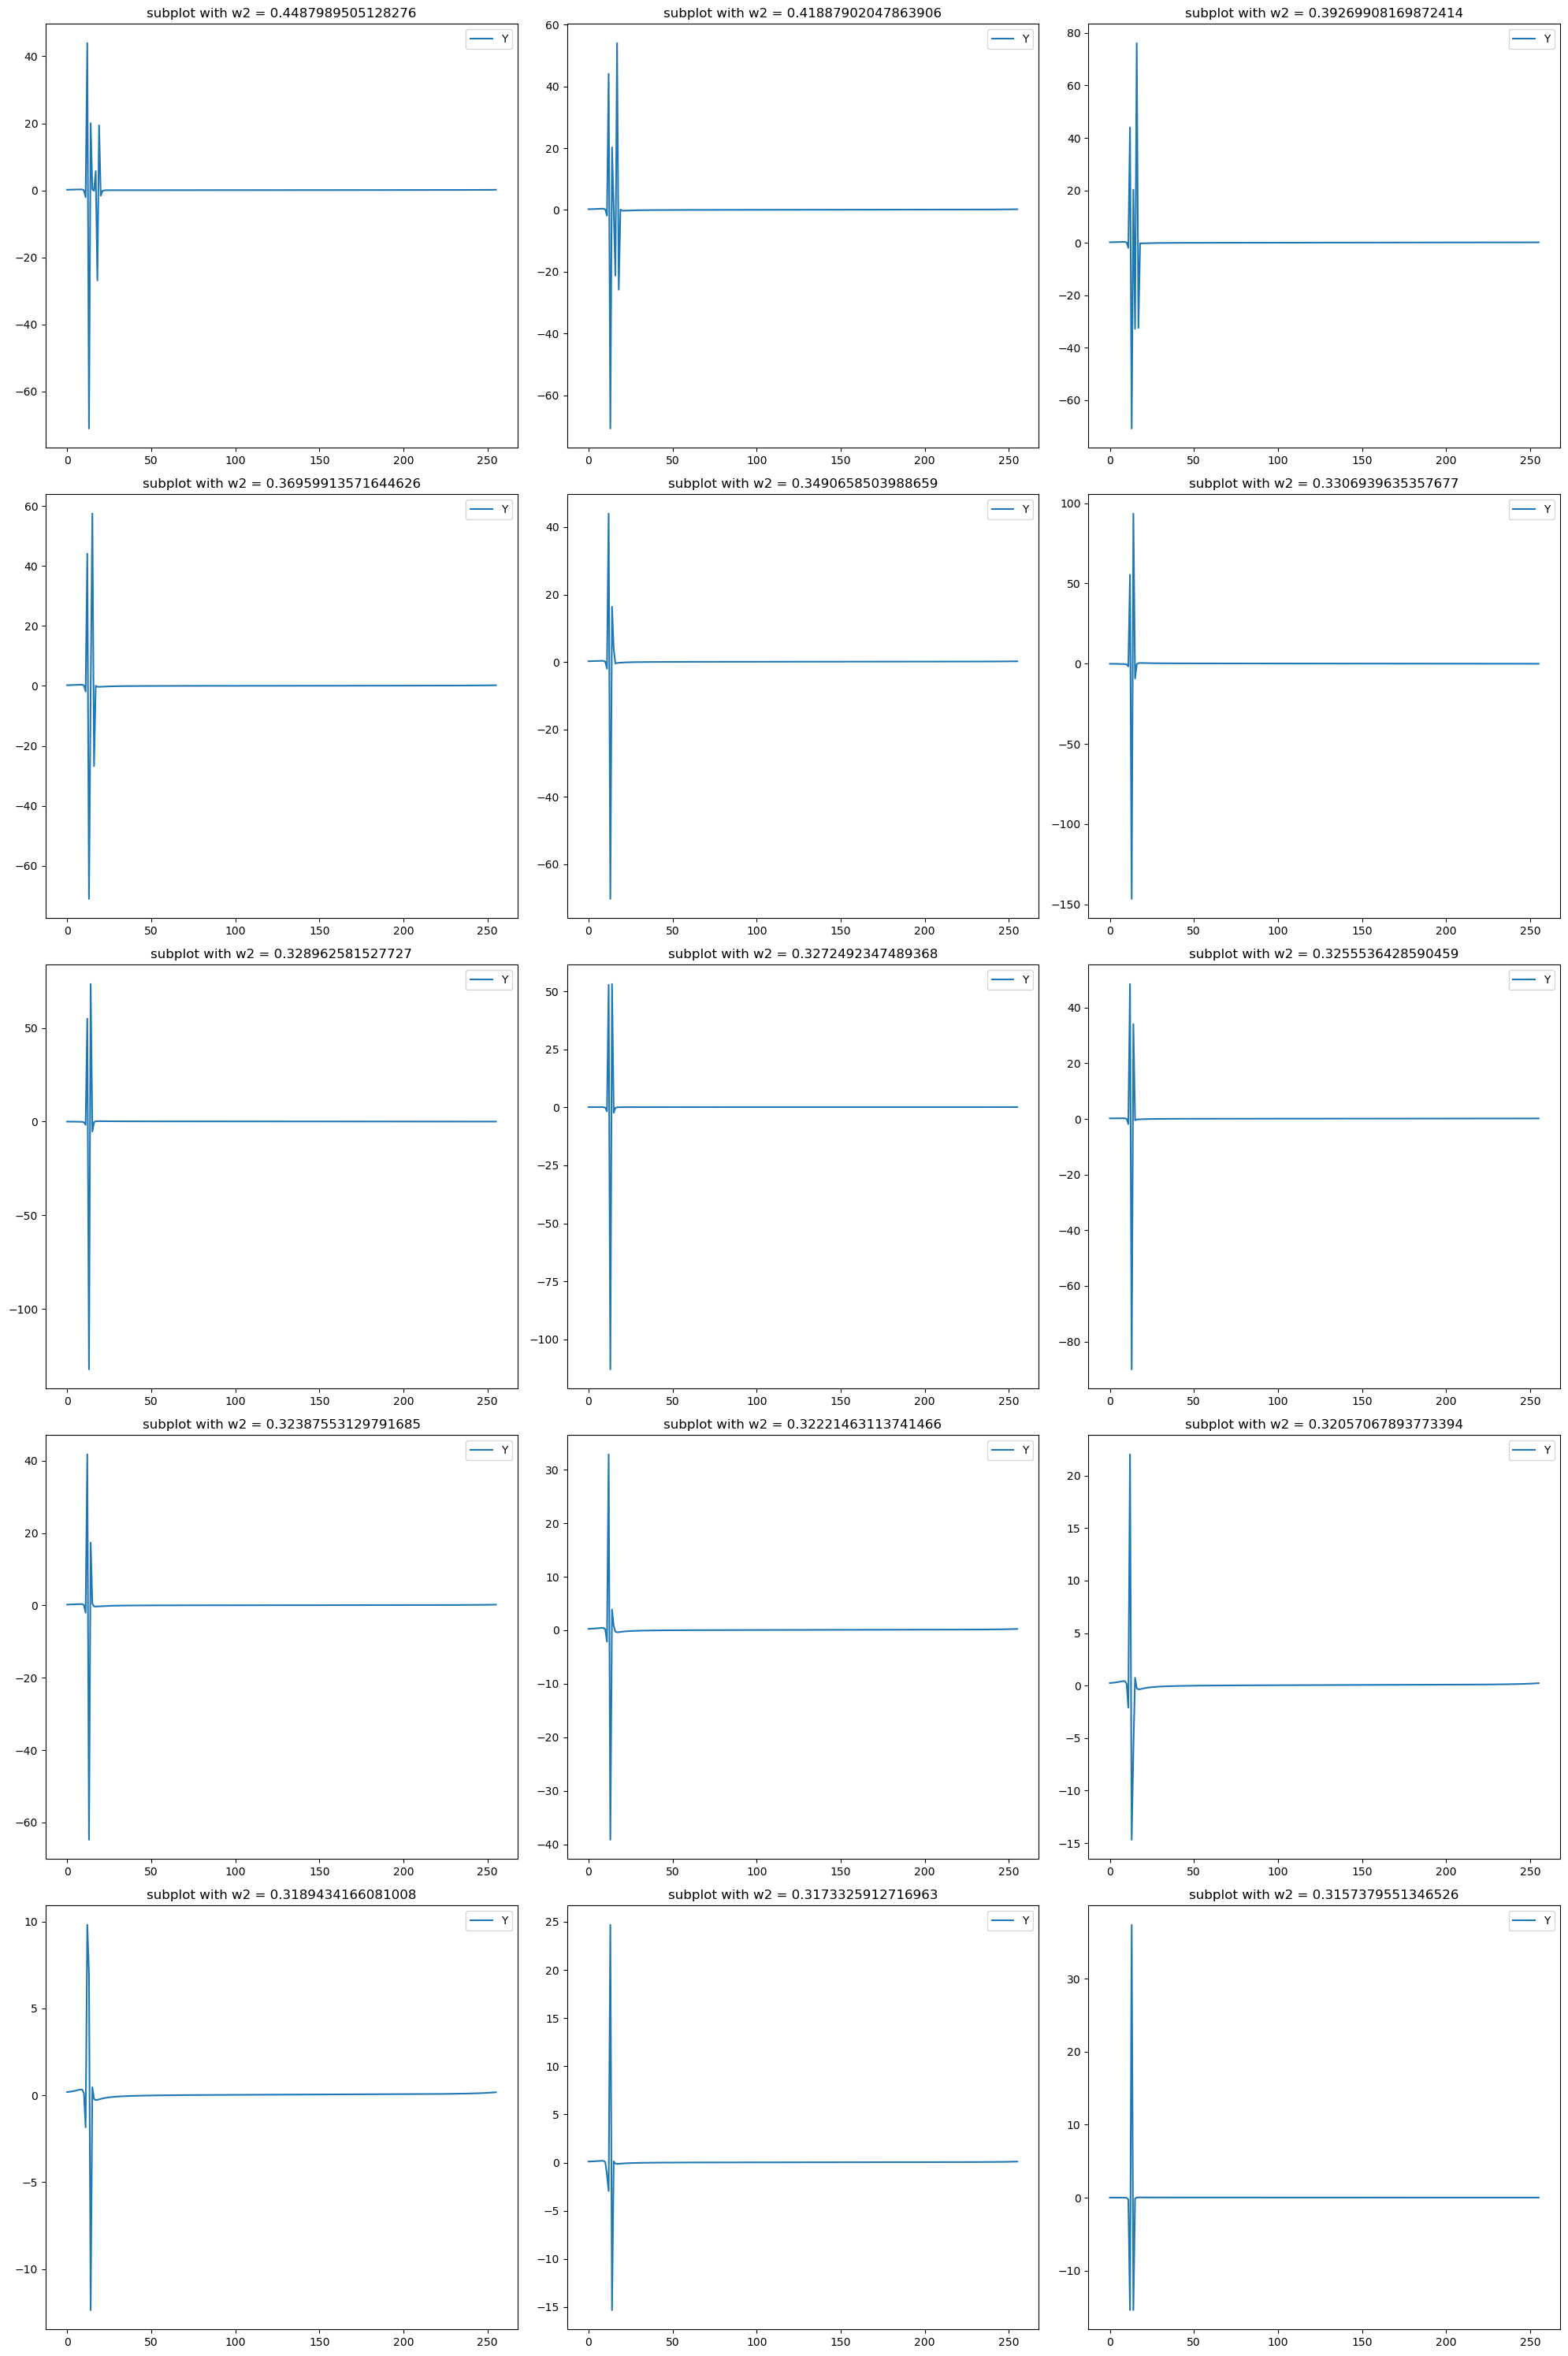

In [2]:
X1 = np.fft.fft(x1)
X2_arr = [np.fft.fft(x2) for x2 in x2_arr]
Y = [np.fft.fft(y) for y in y_arr]

fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(20, 30))

for i, ax in enumerate(axes.flat):  # the flat func makes the 2d array into a 1d
    # ax.plot(X1, label='X1')
    # ax.plot(X2_arr[i], label='X2')
    ax.plot(Y[i], label='Y')
    ax.legend()
    ax.set_title(f'subplot with w2 = {w2_arr[i]}')

fig.tight_layout()

plt.show()

### 1.2 Changing length  ( Γενικά δεν έχω και πολύ καταλάβει τι πρέπει να κάνουμε στα 1.2, 1.3)

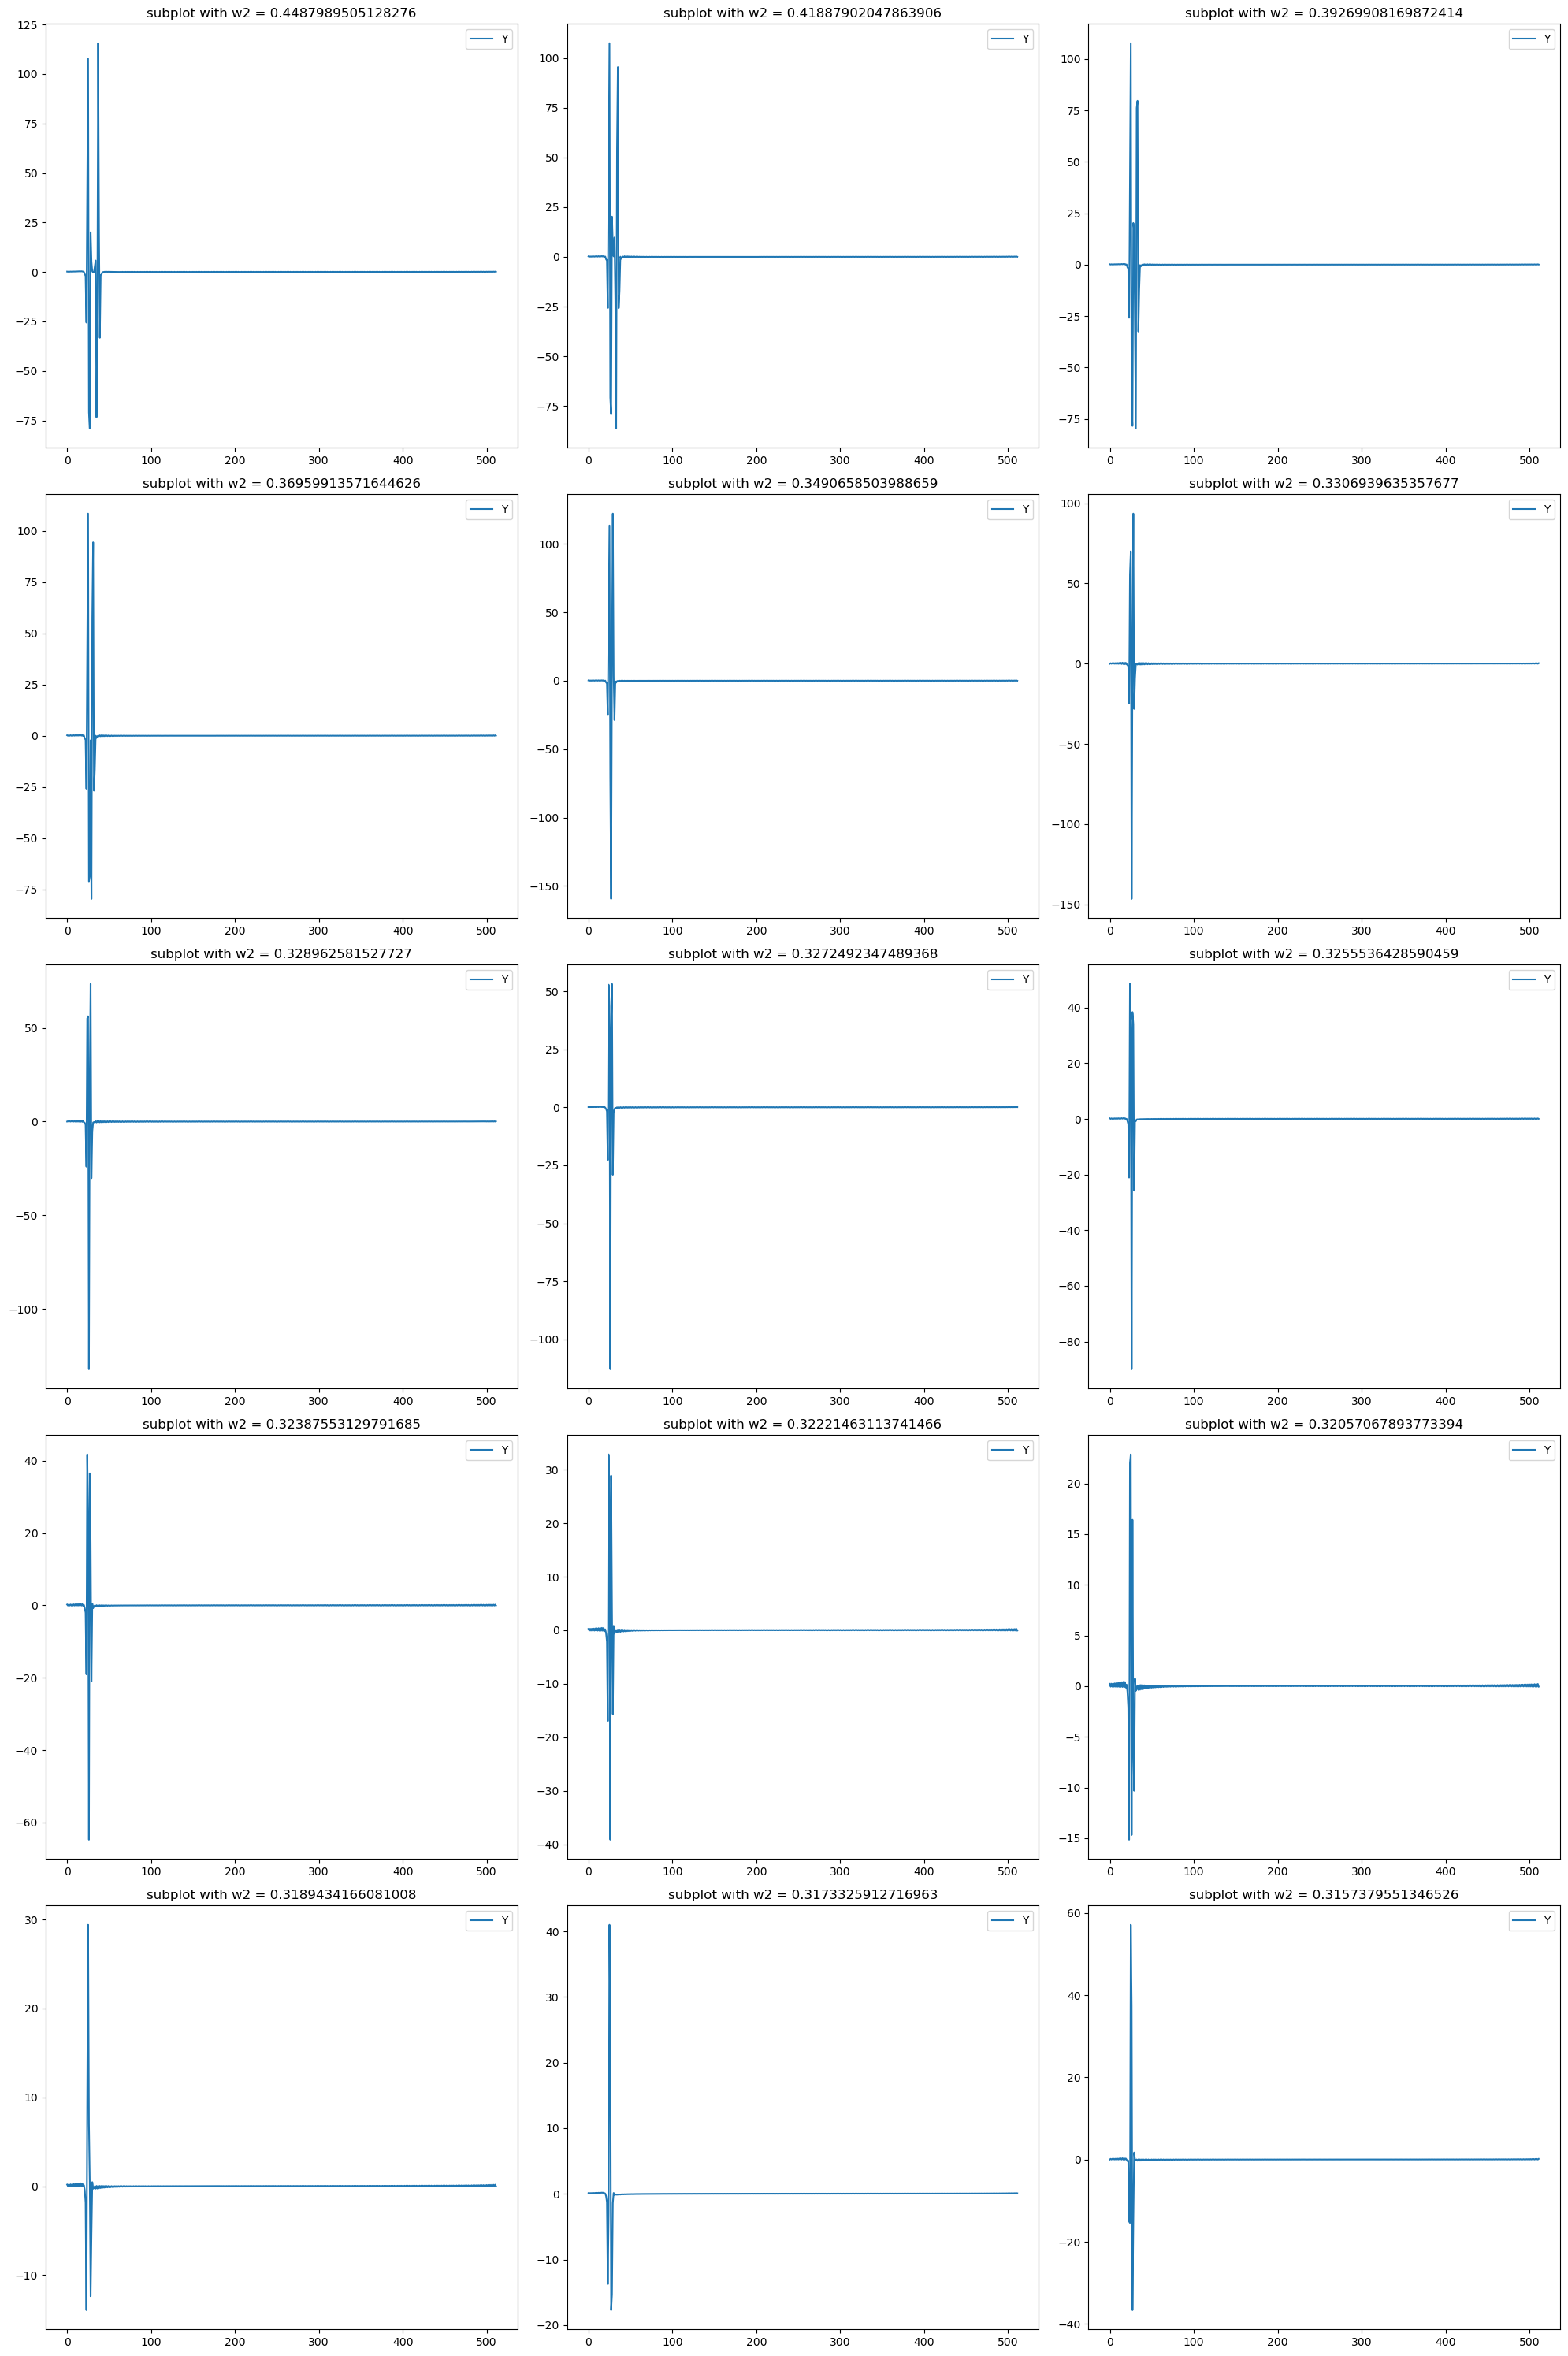

In [3]:
X1 = np.fft.fft(x1)
X2_arr = [np.fft.fft(x2) for x2 in x2_arr]
padded_y = [np.append(y, np.zeros(256)) for y in y_arr]
Y = [np.fft.fft(y) for y in padded_y]

fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(20, 30))

for i, ax in enumerate(axes.flat):  # the flat func makes the 2d array into a 1d
    # ax.plot(X1, label='X1')
    # ax.plot(X2_arr[i], label='X2')
    ax.plot(Y[i], label='Y')
    ax.legend()
    ax.set_title(f'subplot with w2 = {w2_arr[i]}')

fig.tight_layout()

plt.show()

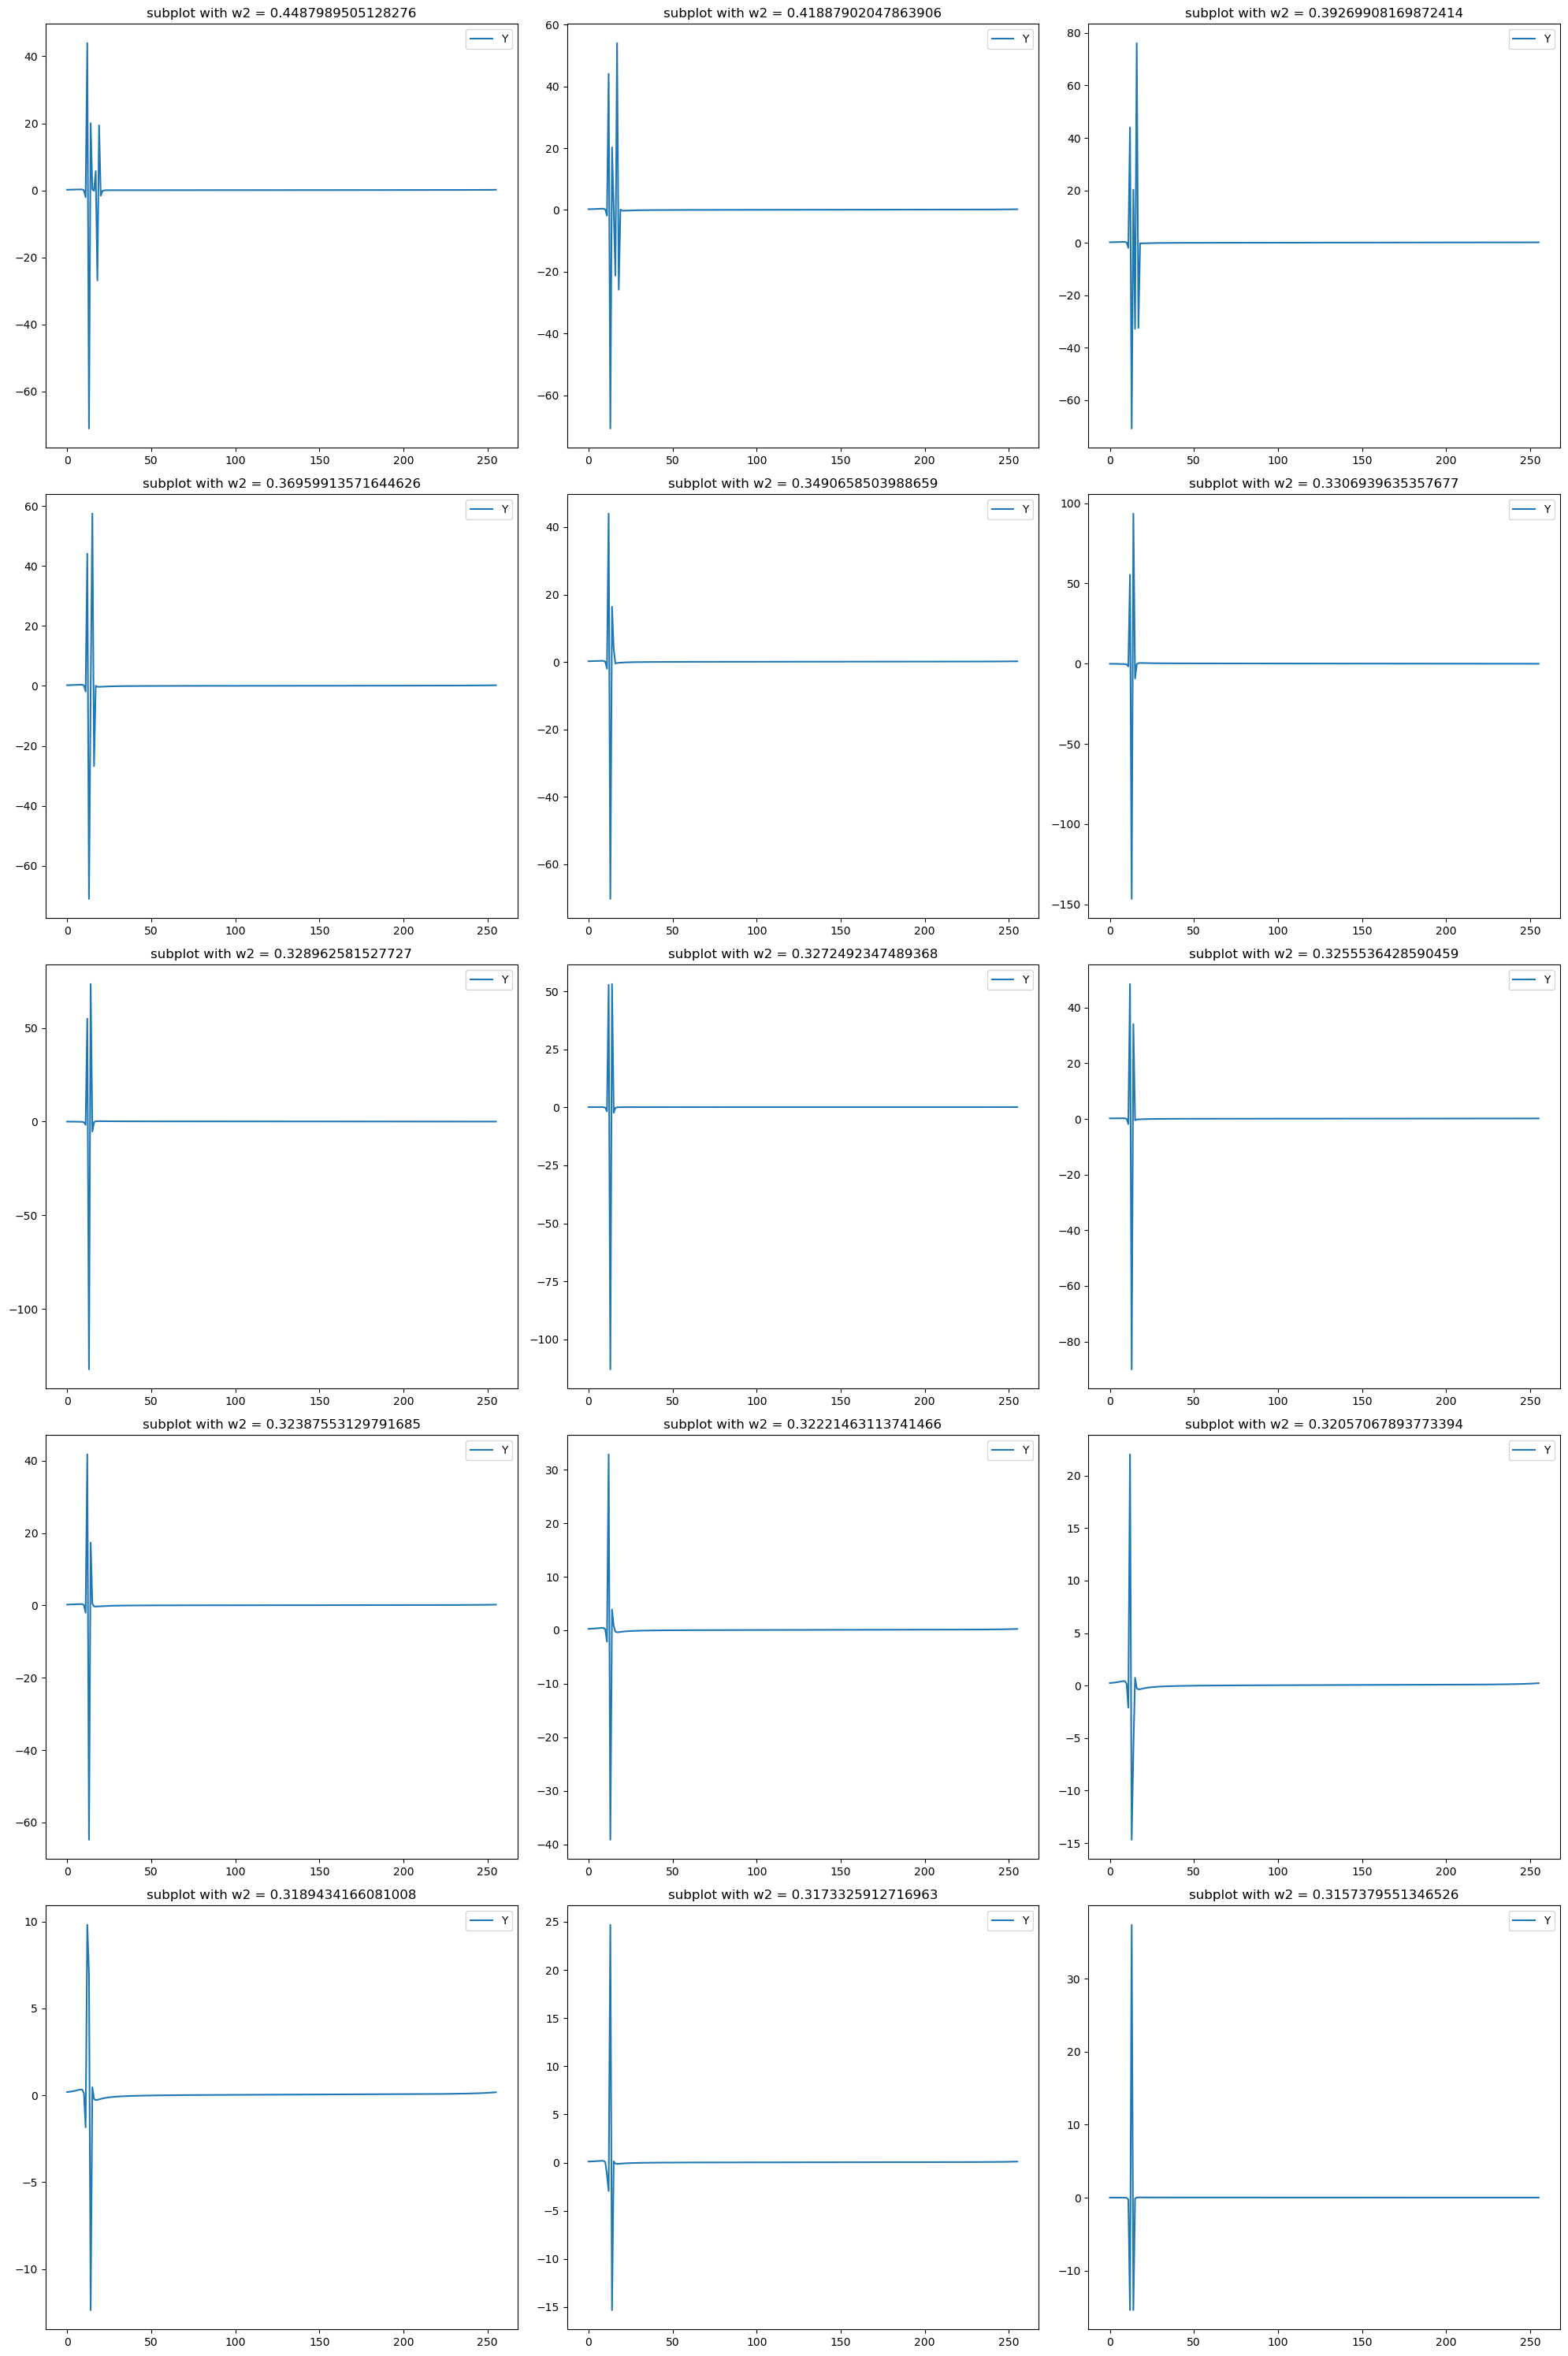

In [4]:
X1 = np.fft.fft(x1)
X2_arr = [np.fft.fft(x2) for x2 in x2_arr]
padded_y = [np.append(y, np.zeros(256+512)) for y in y_arr]
Y = [np.fft.fft(y) for y in y_arr]

fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(20, 30))

for i, ax in enumerate(axes.flat):  # the flat func makes the 2d array into a 1d
    # ax.plot(X1, label='X1')
    # ax.plot(X2_arr[i], label='X2')
    ax.plot(Y[i], label='Y')
    ax.legend()
    ax.set_title(f'subplot with w2 = {w2_arr[i]}')

fig.tight_layout()

plt.show()

Πλέον δεν είμαι και πολύ σίγουρος για το τι πρέπει να κάνω στα 1.2 1.3 αλλά πάμε για να αρχικοποιήσουμε τις τιμές για το 1.4

## 1.4 Διαφορές Hamming - Rectangular window

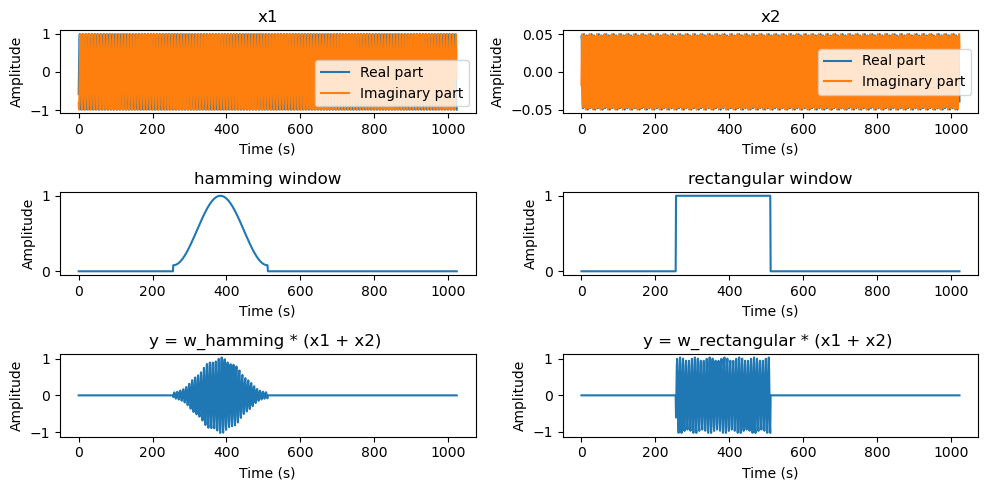

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import pi
from cmath import exp

# Initial values:
A1, A2 = 1, 0.05
L = 256
N = 1024
w1, w2 = 0.25 * pi, 0.3 * pi
phi1, phi2 = np.random.uniform(0, 2 * pi), np.random.uniform(0, 2 * pi)

x1 = np.array([A1 * exp(1j * (w1 * n + phi1)) for n in range(N)])
x2 = np.array([A2 * exp(1j * (w2 * n + phi2)) for n in range(N)])
w_hamm, w_rect = np.zeros(N), np.zeros(N)
w_rect[256:512], w_hamm[256:512] = 1, np.hamming(L)

# C = A * B se np array to C θα έχει διαστάσεις του  A,B kai C[i] = A[i] * B[i] αντίστοιχα για το  +
y_hamm = w_hamm * (x1 + x2)
y_rect = w_rect * (x1 + x2)

Ts = 1  # time interval between samples.
t = np.arange(0, N, Ts)

# Plot the signal
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(10, 5))

axs[0][0].plot(t, np.real(x1), label='Real part')
axs[0][0].plot(t, np.imag(x1), label='Imaginary part')
axs[0][0].set_xlabel('Time (s)')
axs[0][0].set_ylabel('Amplitude')
axs[0][0].set_title('x1')
axs[0][0].legend()

axs[0][1].plot(t, np.real(x2), label='Real part')
axs[0][1].plot(t, np.imag(x2), label='Imaginary part')
axs[0][1].set_xlabel('Time (s)')
axs[0][1].set_ylabel('Amplitude')
axs[0][1].set_title('x2')
axs[0][1].legend()

axs[1][0].plot(t, w_hamm)
axs[1][0].set_xlabel('Time (s)')
axs[1][0].set_ylabel('Amplitude')
axs[1][0].set_title('hamming window')

axs[1][1].plot(t, w_rect)
axs[1][1].set_xlabel('Time (s)')
axs[1][1].set_ylabel('Amplitude')
axs[1][1].set_title('rectangular window')

axs[2][0].plot(t, y_hamm)
axs[2][0].set_xlabel('Time (s)')
axs[2][0].set_ylabel('Amplitude')
axs[2][0].set_title(f'y = w_hamming * (x1 + x2) ')

axs[2][1].plot(t, y_rect)
axs[2][1].set_xlabel('Time (s)')
axs[2][1].set_ylabel('Amplitude')
axs[2][1].set_title(f'y = w_rectangular * (x1 + x2) ')

# Add spacing between subplots.
fig.tight_layout()

plt.show()

C:\Users\kosti_0b5rpb8\anaconda3\envs\dsp_project1\lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


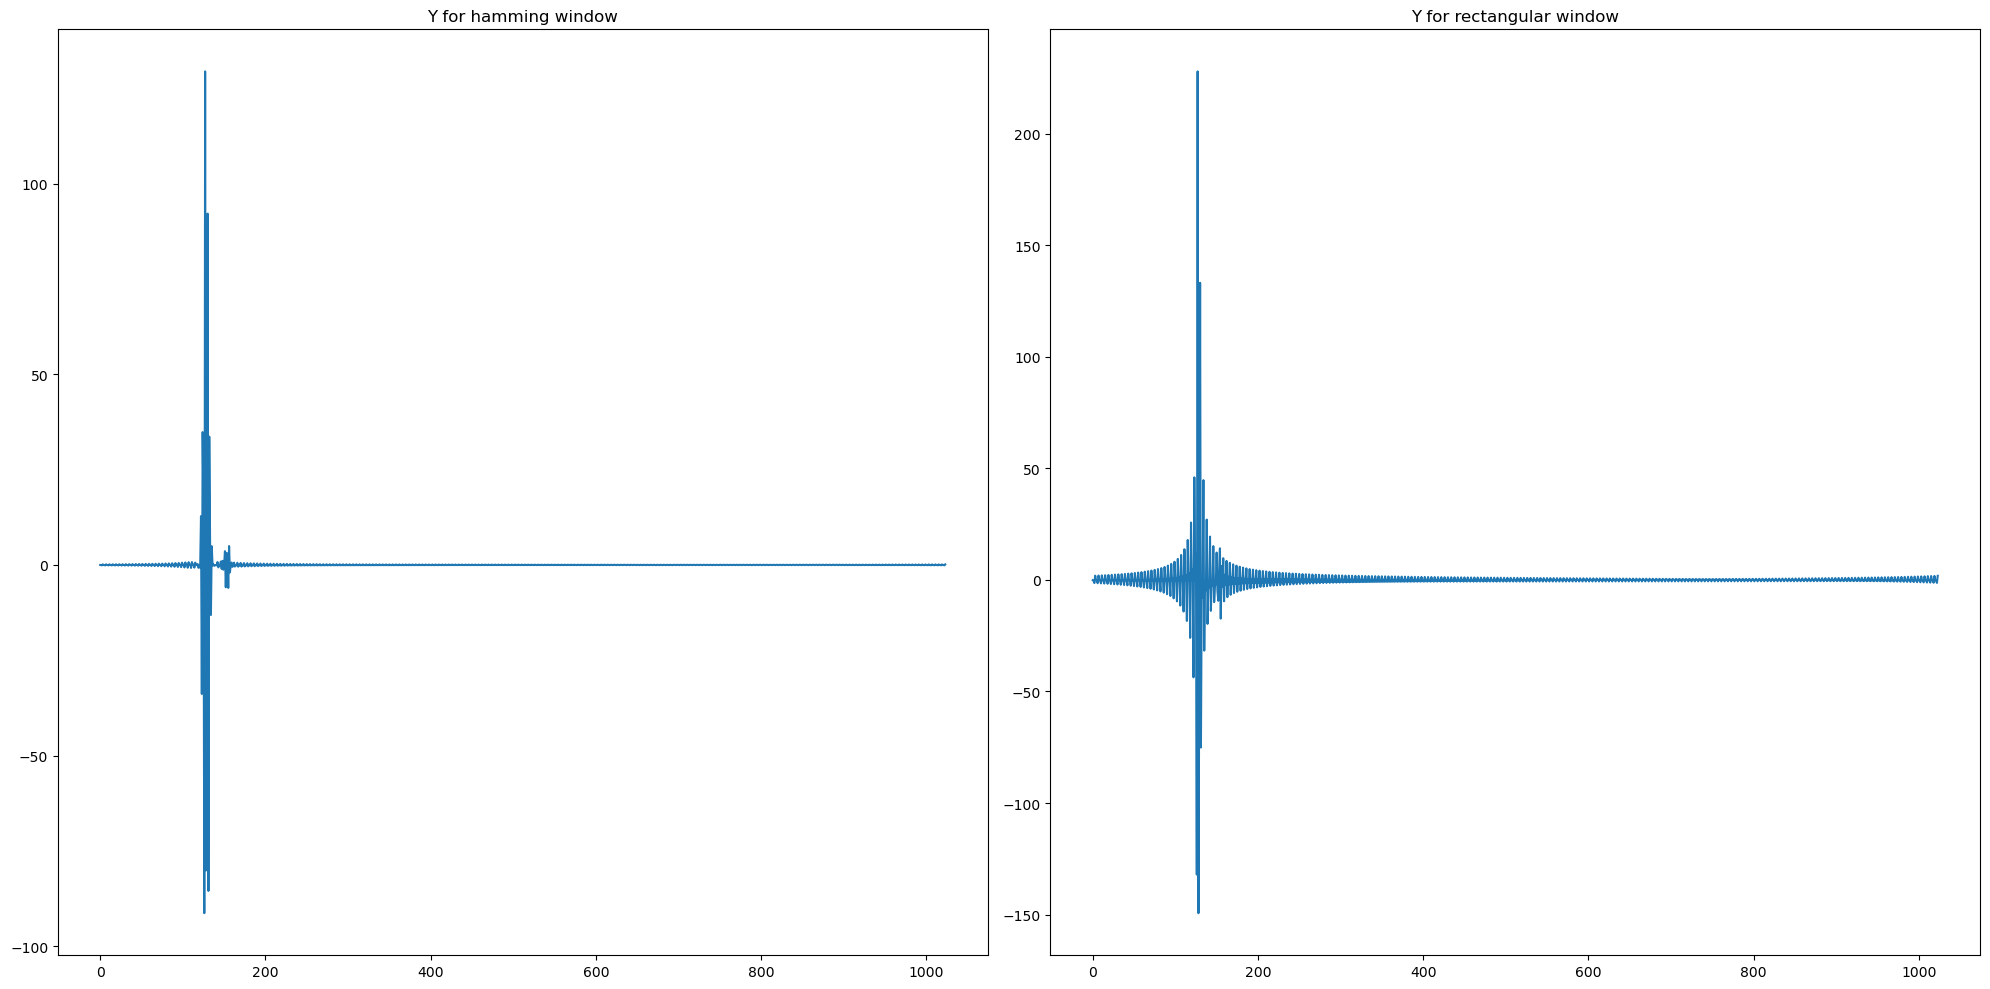

In [10]:
Y_hamm = np.fft.fft(y_hamm)
Y_rect = np.fft.fft(y_rect)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

axes[0].plot(Y_hamm)
axes[0].set_title('Y for hamming window')

axes[1].plot(Y_rect)
axes[1].set_title('Y for rectangular window')

fig.tight_layout()

plt.show()

# Άσκηση 2

### 2.1
**low freq for row, high freq for col**
<img src="button_frequencies_matrix.jpg">

In [17]:
from IPython.display import Audio
from numpy import sin, cos
# Table of frequencies:
L = 1000
Row_freq = [0.5346, 0.5906, 0.6535, 0.7217]
Col_freq = [0.9273, 1.0247, 1.1328]
btn_sound = {"1": [sin(Row_freq[0] * n) + sin(Col_freq[0] * n) for n in range(L)],
             "2": [sin(Row_freq[1] * n) + sin(Col_freq[0] * n) for n in range(L)],
             "3": [sin(Row_freq[2] * n) + sin(Col_freq[0] * n) for n in range(L)],
             "4": [sin(Row_freq[0] * n) + sin(Col_freq[1] * n) for n in range(L)],
             "5": [sin(Row_freq[1] * n) + sin(Col_freq[1] * n) for n in range(L)],
             "6": [sin(Row_freq[2] * n) + sin(Col_freq[1] * n) for n in range(L)],
             "7": [sin(Row_freq[0] * n) + sin(Col_freq[2] * n) for n in range(L)],
             "8": [sin(Row_freq[1] * n) + sin(Col_freq[2] * n) for n in range(L)],
             "9": [sin(Row_freq[2] * n) + sin(Col_freq[2] * n) for n in range(L)],
             "0": [sin(Row_freq[3] * n) + sin(Col_freq[1] * n) for n in range(L)]
             }

display(Audio(btn_sound["6"], rate=44100))



### 2.2

C:\Users\kosti_0b5rpb8\anaconda3\envs\dsp_project1\lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


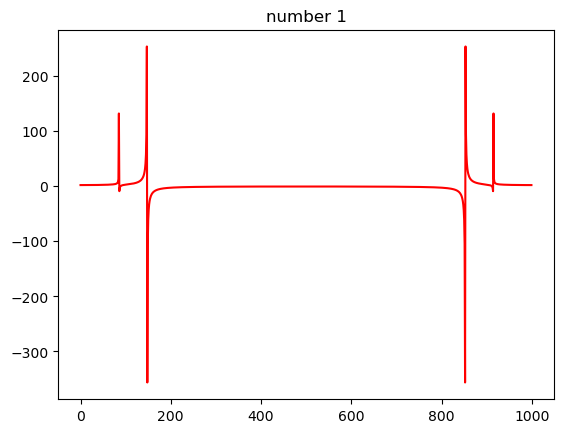

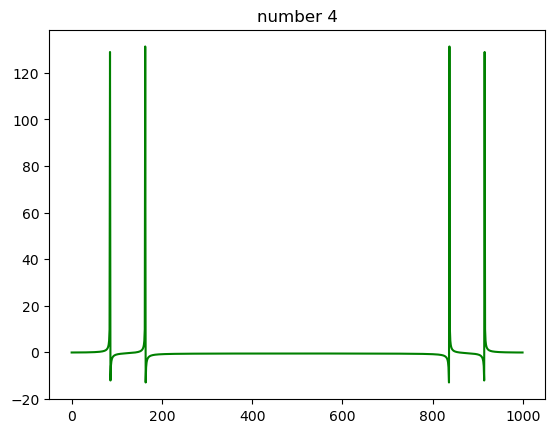

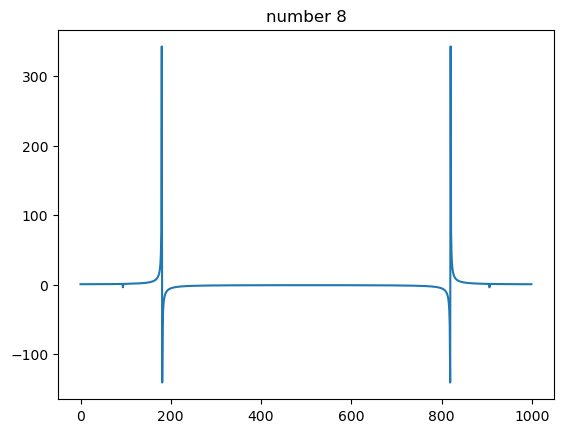

In [24]:
btn_dft = {}
# Create a dictionary named btn_dft
btn_dft = {}

# Compute the FFT of each sound signal and add it to the btn_dft dictionary
for key, sound_signal in btn_sound.items():
    btn_dft[key] = np.fft.fft(sound_signal)

# fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 5))
plt.figure()
plt.plot(btn_dft["1"], color='r')
plt.title('number 1')
plt.figure()
plt.plot(btn_dft["4"], color='g')
plt.title('number 4')
plt.figure()
plt.plot(btn_dft["8"])
plt.title('number 8')

plt.show()

Δεν ξέρω τι παρατηρώ :(...

In [41]:
from scipy.io import wavfile

am, am_sound = '03120866', []
for num in am:
    am_sound = np.concatenate([am_sound, btn_sound[num], np.zeros(100)])

am_sound_norm = np.int16(am_sound / np.max(np.abs(am_sound)) * 32767)

wavfile.write(filename='tone_sequence.wav', rate=44100, data=am_sound_norm)

display(Audio(am_sound, rate=44100))